In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [15]:
class AcornRandom:
    def __init__(self,seed) -> None:

        self.k = 25         # Order k
        self.maxint = 2**60 #Modulus M

        self.ixv1 = np.zeros(self.k+1)
        self.ixv2 = np.zeros(self.k+1)

        self.ixv1[0] = 2**10-seed #inital seed(?) 
        self.ixv2[0] = 2**10-seed #inital seed(?)
        return

    def random(self,N):
        
        rnd_arr = np.zeros(N)

        for j in range(N):
            for i in range(self.k):
                self.ixv1[i+1] =  self.ixv1[i+1]+ self.ixv1[i]
                self.ixv2[i+1] =  self.ixv2[i+1]+ self.ixv2[i]

                if self.ixv2[i+1]>= self.maxint:
                    self.ixv2[i+1]= self.ixv2[i+1]-self.maxint
                    self.ixv1[i+1]= self.ixv1[i+1]+1

                if  self.ixv1[i+1]>=self.maxint:
                    self.ixv1[i+1]= self.ixv1[i+1]-self.maxint

            rnd_arr[j] = (self.ixv1[self.k]+(self.ixv2[self.k]/self.maxint))/self.maxint
            
        return rnd_arr

In [18]:

rnd = AcornRandom(393)

a = rnd.random(10000)


[ 1.          0.01026411 -0.01248533 ... -0.01032464  0.01575817
  0.00463004]


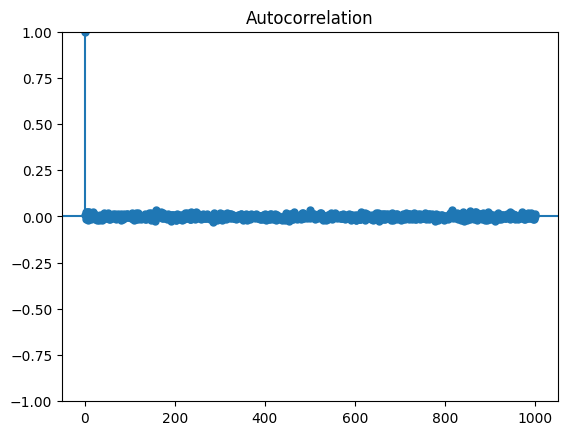

In [19]:

acf = sm.tsa.stattools.acf(a, nlags = 1000, fft=False)
print(acf)

fig2 = tsaplots.plot_acf(a, lags=1000, fft=False)
plt.show()